In [61]:
from util import parse_let, LetFields, pretty_save
import pandas as pd
import matplotlib.pyplot as plt

years = [*range(2020, 2032)]

# folder = "ciclo_solar_let_leo_polar"
# suffix = "_leo_polar"

# folder = "ciclo_solar_let_leo_nopolar"
# suffix = "_leo_nopolar"

folder = "data"
suffix = ""

files = [f"{folder}/LET{y}.let" for y in years]

In [62]:
df = pd.concat((parse_let(f) for f in files), keys=years).loc[:, [LetFields.let, LetFields.flux]]
df.index.set_names(["YEAR", "ELEM"], inplace=True)

display(df)

LetFields.let  LetFields.flux
YEAR ELEM                               
2020 0          0.001609    4.404180e+00
     1          0.001627    4.404180e+00
     2          0.001645    4.404180e+00
     3          0.001664    4.404180e+00
     4          0.001682    4.010410e+00
...                  ...             ...
2031 995      104.624000    1.310630e-14
     996      105.796000    0.000000e+00
     997      106.981000    0.000000e+00
     998      108.179000    0.000000e+00
     999      109.391000    0.000000e+00

[12000 rows x 2 columns]

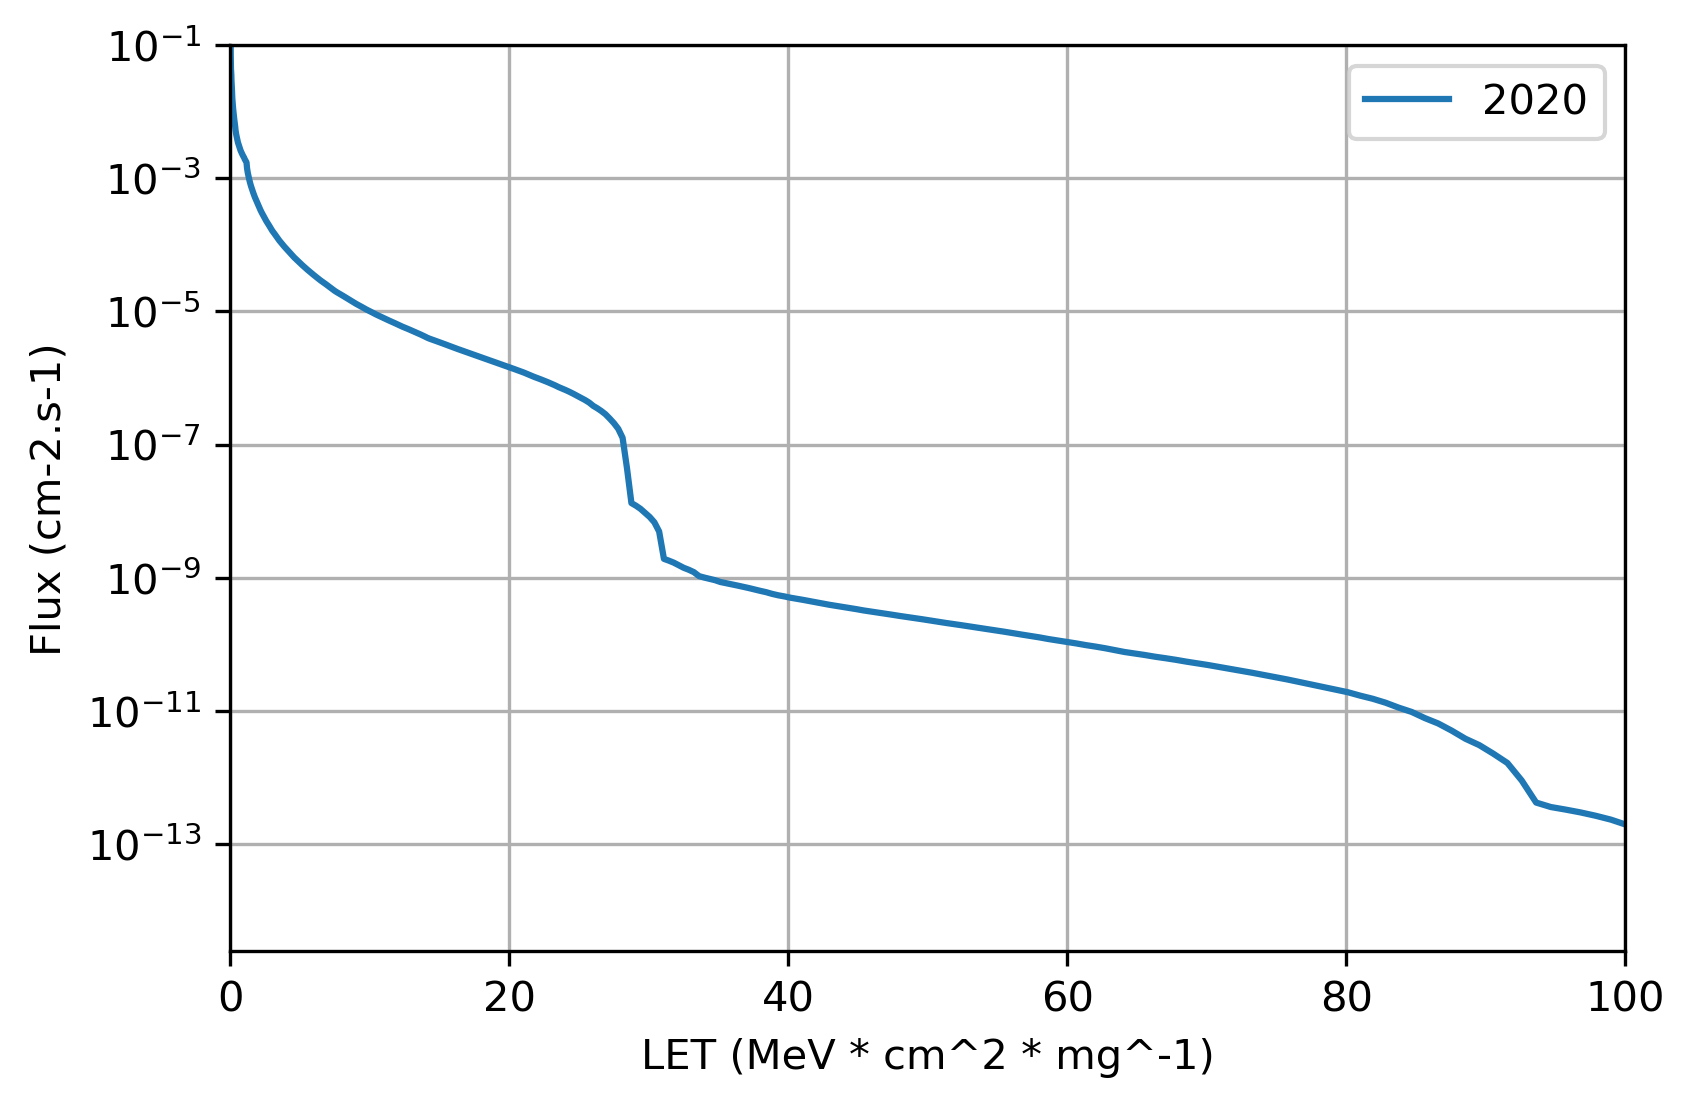

In [63]:
fig, ax = plt.subplots(1,1, dpi=300)
for y in [2020]:
    df.loc[y].plot(x=LetFields.let, y=LetFields.flux, ax=ax, label=y)
ax.set_xbound(lower=0, upper=100)
ax.set_yscale('log')
ax.set_ybound(upper=10e-2)
ax.set_xlabel(LetFields.let.value)
ax.set_ylabel(LetFields.flux.value)
ax.grid()

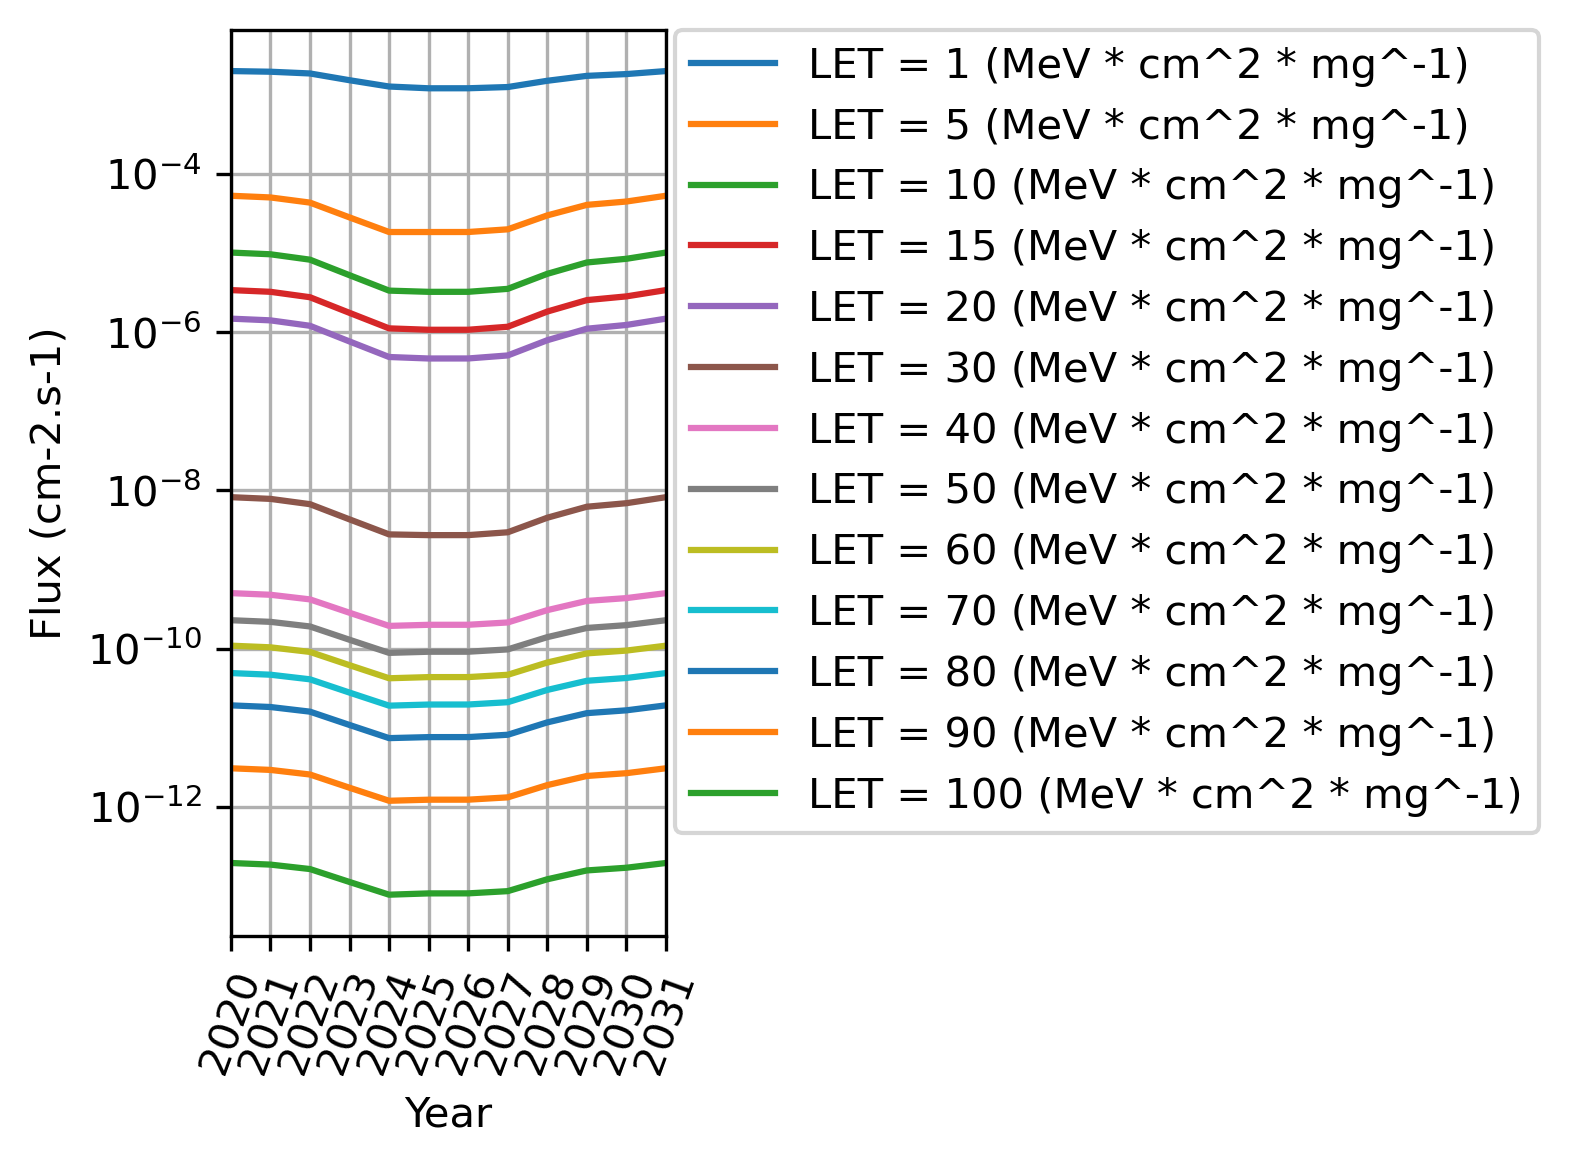

In [64]:
lets = [1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# lets = [30]

fig, ax = plt.subplots(1,1, dpi=300)

std_devs_norm = list()

for target_let in lets:

    filter = []
    for y in years:
        subdf = df.loc[y]
        target_let_idx = (subdf[LetFields.let] - target_let).abs().idxmin()
        filter.append((y, target_let_idx))

    dfy2y = df.filter(filter, axis=0).unstack().droplevel(1, axis=1)

    std_dev = dfy2y[LetFields.flux].std()
    mean = dfy2y[LetFields.flux].mean()

    std_devs_norm.append(std_dev / mean)

    ax = dfy2y.plot(y=LetFields.flux, ax=ax, label=f"LET = {target_let} (MeV * cm^2 * mg^-1)")


ax.set_yscale('log')
ax.set_xlabel("Year")
ax.set_ylabel(LetFields.flux.value)
_ = ax.set_xticks(years)
ax.tick_params(axis='x',labelrotation=70)
ax.set_xbound(lower=2020, upper=2031)
ax.grid(which="both")
ax.set_aspect(2)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


pretty_save(fig, f"generated/LET_y2y{suffix}.jpg")

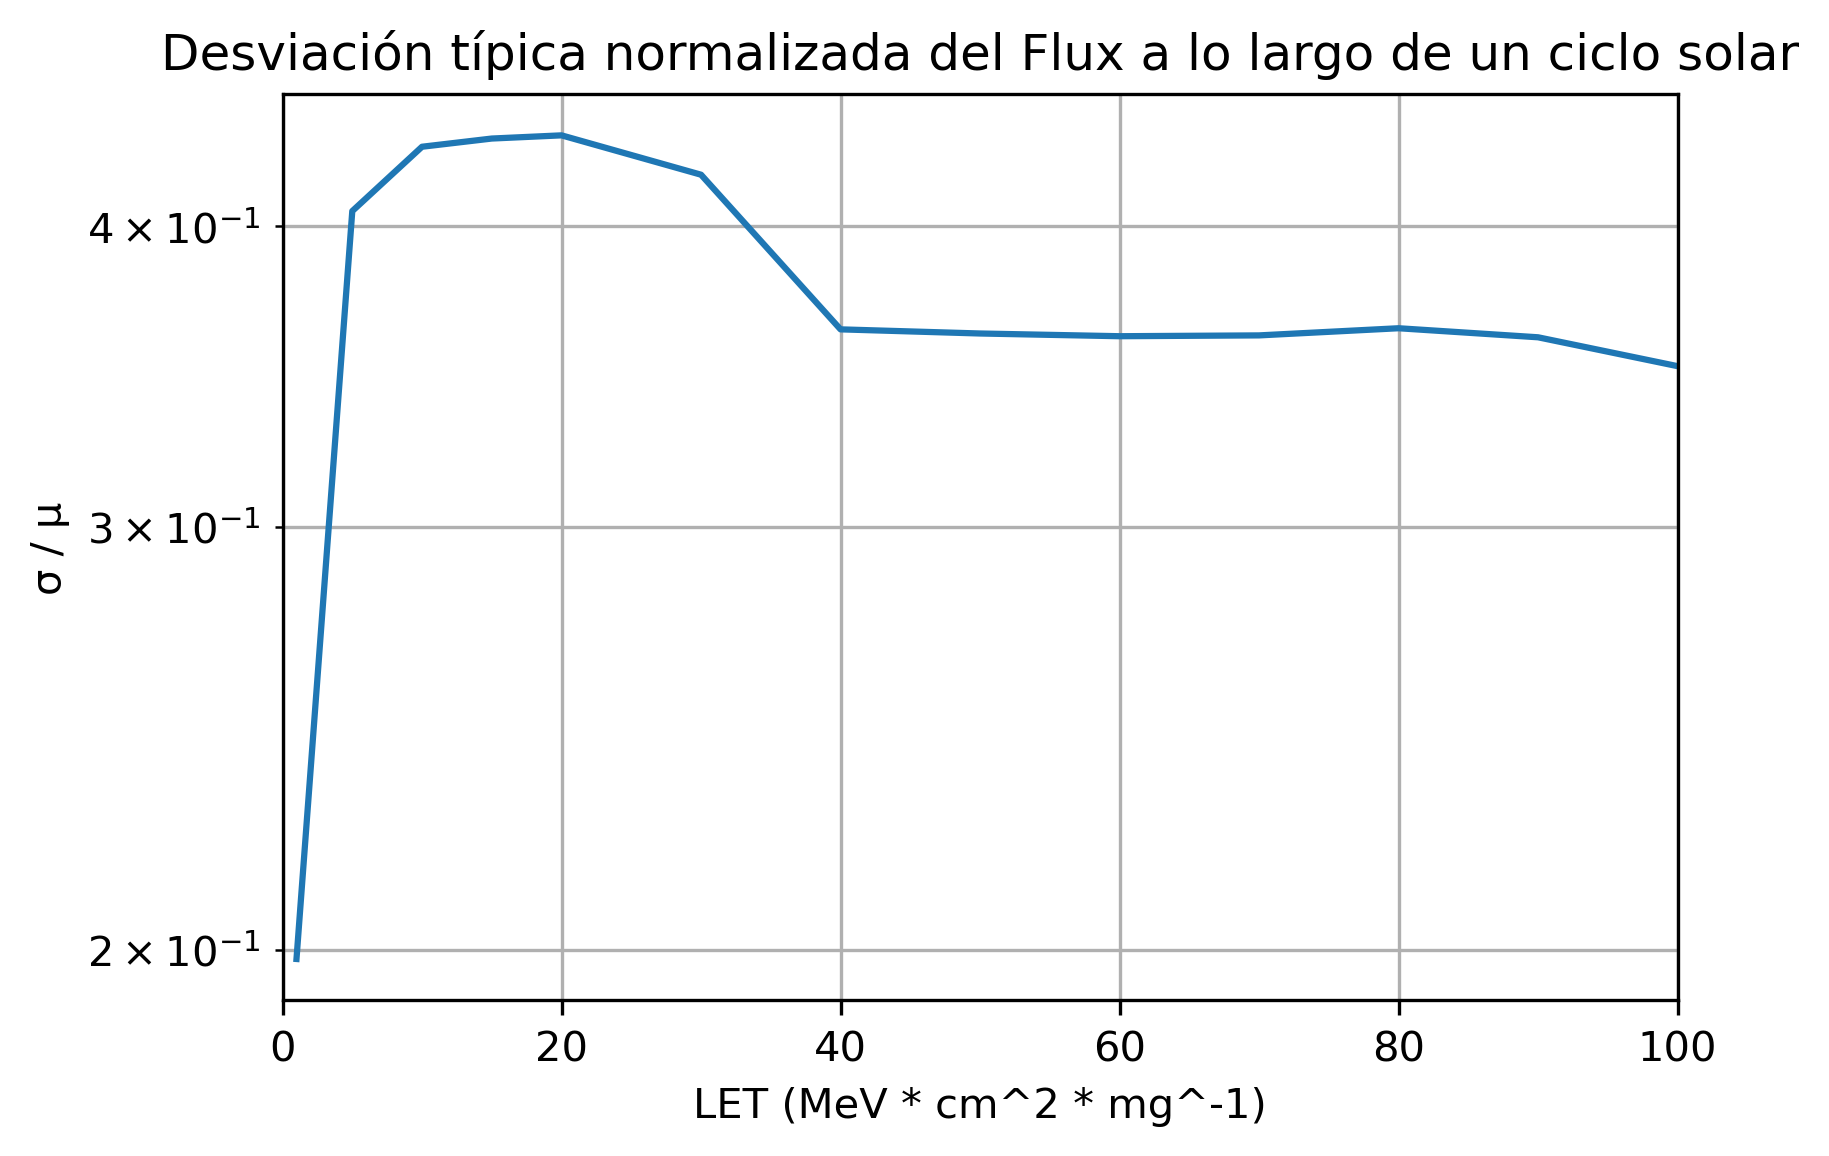

In [65]:
fig, ax = plt.subplots(1,1, dpi=300)


ax.plot(lets, std_devs_norm)
ax.set_yscale('log')
ax.set_xlabel("sigma")
ax.set_xbound(lower=0, upper=100)
ax.grid(which="both")
ax.set_xlabel(LetFields.let.value)
ax.set_ylabel(f"σ / μ")
ax.set_title("Desviación típica normalizada del Flux a lo largo de un ciclo solar")

pretty_save(fig, f"generated/LET_sigma{suffix}.jpg")